In [4]:
# This notebook read several dataframes (CSV files), each is the output analysis of one neuron
# and it combine them, average them and plot

In [466]:
data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/figs/'

plot_col = 'x_spread'

if save_path[-1] != '/':
    save_path += '/'

In [467]:
import os
import utils.datautils as datautils
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import seaborn as sns

plotting adult data

In [351]:
# circ_AB = [0.7887, 0.7252, 0.7143, 0.8603, 0.8095, 0.7912, 0.7989, 0.7182, 0.7414, 0.7151, 0.6877]
# circ_CD = [0.7551, 0.7777, 0.6806, 0.7276, 0.8157, 0.8244, 0.6532, 0.6421, 0.759, 0.7517, 0.7779]
# width_AB = [141, 162, 130, 171, 189, 182, 180, 159, 145, 134, 186]
# width_CD = [157, 228, 164, 174, 200, 180, 168, 145, 208, 177, 188]
# height_AB = [267, 369, 295, 273, 318, 364, 330, 323, 321, 347, 440]
# height_CD =[335, 386, 380, 321, 309, 325, 461, 418, 380, 342, 354]
# AB_type = ['Horizontal subtypes' for neu in circ_AB]
# CD_type = ['Vertical subtypes' for neu in circ_CD]
# adult_data = {'subtype': np.concatenate((AB_type, CD_type)), 
#                 'circularity':np.concatenate((circ_AB, circ_CD)),
#                 'AP_spread':np.concatenate((width_AB, width_CD)),
#                 'DV_spread':np.concatenate((height_AB, height_CD))}
# adult_data = pd.DataFrame(adult_data)
# # saving the collective csv file
# output_file = save_path+'adult_data.csv'
# adult_data.to_csv(output_file, sep=';')

# data = pd.read_csv('/home/tli_project/Desktop/Data/T4/neurons/output/adult_data_220704_1.csv', sep=';')
# data.head()

<class 'matplotlib.collections.PolyCollection'>
<class 'matplotlib.collections.PolyCollection'>


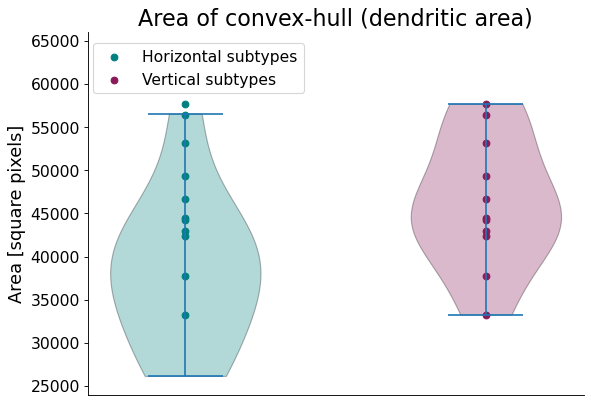

In [426]:
hor_sub = data[data.subtype == 'horizontal']
ver_sub = data[data.subtype == 'vertical']
AB_d = hor_sub.Pixels/hor_sub.Area
CD_d = ver_sub.Pixels/ver_sub.Area
AB_a = hor_sub.Area
CD_a = ver_sub.Area

colors = ['teal','#881a58']
plt.figure(figsize=(8, 6), dpi=80)
# fig, ax = plt.subplots()
vio_plt = plt.violinplot((AB_a, CD_a), positions=(1,2))
for i, pc in enumerate(vio_plt['bodies']):
    print(type(pc))
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
plt.scatter(np.ones(len(AB_a)), CD_a, c='teal', label='Horizontal subtypes')
plt.scatter(np.ones(len(AB_a))+1, CD_a, c='#881a58',  label='Vertical subtypes')
plt.ylim(24000,66000)
# plt.show()
plt.legend(bbox_to_anchor=(.01, 0.97), loc=2, borderaxespad=0., prop={'size': 14})
plt.title('Area of convex-hull (dendritic area)', fontsize=20)
plt.yticks(fontsize=14)
# plt.ylabel('dendritic Spread in µm', fontsize=16)
plt.ylabel('Area [square pixels]', fontsize=16)
plt.tick_params(
axis='x', # changes apply to the x-axis
which='both', # both major and minor ticks are affected
bottom=False, # ticks along the bottom edge are off
top=False, # ticks along the top edge are off
labelbottom=False) # labels along the bottom edge are off
sns.despine()
fig_name = save_path+'adult_area.pdf'
plt.savefig(fig_name, bbox_inches='tight')

<class 'matplotlib.collections.PolyCollection'>
<class 'matplotlib.collections.PolyCollection'>
<class 'matplotlib.collections.PolyCollection'>
<class 'matplotlib.collections.PolyCollection'>


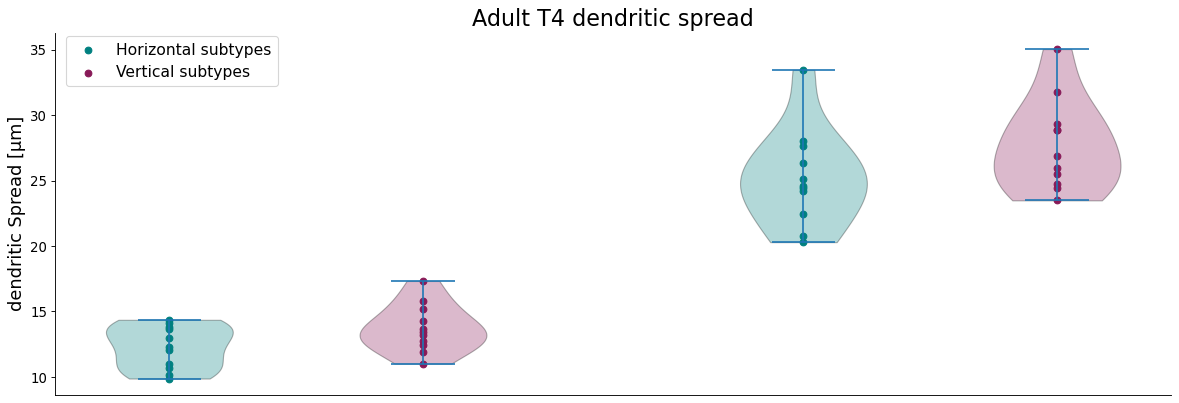

In [391]:
AB_w = np.array(width_AB)*0.076
CD_w = np.array(width_CD)*0.076
AB_h = np.array(height_AB)*0.076
CD_h = np.array(height_CD)*0.076

colors = ['teal','#881a58', 'teal','#881a58']

plt.figure(figsize=(18, 6), dpi=80)
vio_plt = plt.violinplot((AB_w, CD_w, AB_h, CD_h), positions=(1,2,3.5,4.5))
for i, pc in enumerate(vio_plt['bodies']):
    print(type(pc))
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
plt.scatter(np.ones(len(AB_w)), AB_w, c='teal', label='Horizontal subtypes')
plt.scatter(np.ones(len(CD_w))+1, CD_w, c='#881a58',  label='Vertical subtypes')
plt.scatter(np.ones(len(AB_h))+2.5, AB_h, c='teal')
plt.scatter(np.ones(len(CD_h))+3.5, CD_h, c='#881a58')
plt.legend(bbox_to_anchor=(.01, .99), loc=2, borderaxespad=0., prop={'size': 14})
plt.title('Adult T4 dendritic spread', fontsize=20)
plt.yticks(fontsize=12)
plt.ylabel('dendritic Spread [µm]', fontsize=16)
plt.tick_params(
axis='x', # changes apply to the x-axis
which='both', # both major and minor ticks are affected
bottom=False, # ticks along the bottom edge are off
top=False, # ticks along the top edge are off
labelbottom=False) # labels along the bottom edge are off
sns.despine()
fig_name = save_path+'adult_values.pdf'
plt.savefig(fig_name, bbox_inches='tight')

Reading output files and creating dataframes

In [468]:
# getting a list of the single csv output files
output_files = datautils.get_file_names(data_path, group_by='_output', order=True, nested_files=False, criteria='.csv')
# output_files

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/220209_P36_N2_sA_output.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/220209_P36_N1_sC_output.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/220127_P36_N1_sC_output.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/211121_P36.5_N3_sC_output.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/211121_P36.5_N2_sA_output.csv']


In [469]:
neu_types = {}
for neu in output_files:
    name = os.path.basename(neu)
    neu_type = name[name.find('_s'):name.find('_out')][2:]
    name = os.path.basename(name[:name.find('_output.csv')])
    neu_types[name] = neu_type
neu_types1 = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types1 = pd.DataFrame(neu_types1)

In [470]:
# creating a dataframe with 1 column of timepoints
timepoints = {'timepoints':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)

In [471]:
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('_output.csv')])
    temp_df = pd.read_csv(file, sep=';', usecols = ['timepoints', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoints')

In [472]:
# collective_results = collective_results.set_index('timepoints')
collective_results.head()

,timepoints,220209_P36_N2_sA,220209_P36_N1_sC,220127_P36_N1_sC,211121_P36.5_N3_sC,211121_P36.5_N2_sA,211121_P36.5_N1_sA,211114_P36_N3_sC,211114_P36_N2_sA,211114_P36_N1_sA,211113_P36_N2_sA,211113_P36_N1_sC,211107_P36_N3_sC,211107_P36_N2_sC,211107_P36_N1_sA,211104_P36_N3_sC,211104_P36_N2_sA,211104_P36_N1_sC,211011_P37_N1_sB
0,38.00,66,63,80,63,87,68,57,69,80,66,62,67,57,75,59,45,70,90
1,38.25,62,65,80,64,91,68,56,75,84,63,58,67,56,76,71,63,70,93
2,38.50,67,66,81,67,93,67,58,79,80,65,63,65,57,76,59,64,60,101
3,38.75,65,68,81,68,84,67,64,71,80,67,64,78,55,79,56,65,64,94
4,39.00,62,63,81,68,83,69,77,72,80,68,63,78,55,80,60,58,64,94


In [473]:
# # run in case if you want to import another parameter
plot_col1 = 'y_spread'
# timepoints = {'timepoints':np.arange(36,58,0.25)}
collective_results1 = pd.DataFrame(timepoints)
for file in output_files:
    neu_name = os.path.basename(file[:file.find('_output.csv')])
    temp_df = pd.read_csv(file, sep=';', usecols = ['timepoints', plot_col1])
    temp_df = temp_df.rename(columns={plot_col1:neu_name})
    collective_results1 = pd.merge(collective_results1, temp_df, on='timepoints')
collective_results1.head()

,timepoints,220209_P36_N2_sA,220209_P36_N1_sC,220127_P36_N1_sC,211121_P36.5_N3_sC,211121_P36.5_N2_sA,211121_P36.5_N1_sA,211114_P36_N3_sC,211114_P36_N2_sA,211114_P36_N1_sA,211113_P36_N2_sA,211113_P36_N1_sC,211107_P36_N3_sC,211107_P36_N2_sC,211107_P36_N1_sA,211104_P36_N3_sC,211104_P36_N2_sA,211104_P36_N1_sC,211011_P37_N1_sB
0,38.00,117,90,65,102,98,140,136,135,148,131,79,127,87,165,96,127,141,129
1,38.25,126,92,64,109,99,141,134,141,146,130,81,126,91,196,96,126,140,131
2,38.50,115,92,65,111,100,141,135,140,148,132,83,127,87,173,99,124,140,145
3,38.75,150,93,63,130,104,132,139,140,138,121,82,127,86,174,103,125,140,174
4,39.00,123,97,63,128,102,133,139,151,128,120,78,125,82,160,113,176,140,175


In [474]:
# Normalize results of each neuron.
# This is very dependant on the selected analysis point
norm_results = collective_results.copy()


# For example, to normalize all timepoints based on T0, use the following line 
# norm_results.loc[:, norm_results.columns != 'timepoints'] = norm_results.loc[:, norm_results.columns != 'timepoints'].div(norm_results.loc[0, norm_results.columns != 'timepoints'])

# ### if the normalization is a division of two seperate tables
# norm_results.loc[:, norm_results.columns != 'timepoints'] = collective_results.loc[:, collective_results.columns != 'timepoints']/collective_results1.loc[0, collective_results1.columns != 'timepoints']

## to multiple the table a multiplier
norm_results.loc[:, norm_results.columns != 'timepoints'] = norm_results.loc[:, norm_results.columns != 'timepoints'] *0.076

# diff of T from T_1
# norm_results.loc[:, norm_results.columns != 'timepoints'] = norm_results.loc[:, norm_results.columns != 'timepoints'].diff()

In [475]:
# calculate the mean and Std of all normalized neurons, and add the mean and std to collective_results
# subset = collective_results.loc[:, collective_results.columns != 'timepoints']
norm_results['mean_'+plot_col] = norm_results.loc[:, norm_results.columns != 'timepoints'].mean(axis = 1)
norm_results['std_'+plot_col] = norm_results.loc[:, norm_results.columns != 'timepoints'].std(axis = 1)
norm_results.head()

,timepoints,220209_P36_N2_sA,220209_P36_N1_sC,220127_P36_N1_sC,211121_P36.5_N3_sC,211121_P36.5_N2_sA,211121_P36.5_N1_sA,211114_P36_N3_sC,211114_P36_N2_sA,211114_P36_N1_sA,...,211113_P36_N1_sC,211107_P36_N3_sC,211107_P36_N2_sC,211107_P36_N1_sA,211104_P36_N3_sC,211104_P36_N2_sA,211104_P36_N1_sC,211011_P37_N1_sB,mean_x_spread,std_x_spread
0,38.00,5.016,4.788,6.080,4.788,6.612,5.168,4.332,5.244,6.080,...,4.712,5.092,4.332,5.700,4.484,3.420,5.320,6.840,5.168000,0.827512
1,38.25,4.712,4.940,6.080,4.864,6.916,5.168,4.256,5.700,6.384,...,4.408,5.092,4.256,5.776,5.396,4.788,5.320,7.068,5.328444,0.820850
2,38.50,5.092,5.016,6.156,5.092,7.068,5.092,4.408,6.004,6.080,...,4.788,4.940,4.332,5.776,4.484,4.864,4.560,7.676,5.353778,0.902173
3,38.75,4.940,5.168,6.156,5.168,6.384,5.092,4.864,5.396,6.080,...,4.864,5.928,4.180,6.004,4.256,4.940,4.864,7.144,5.362222,0.746892
4,39.00,4.712,4.788,6.156,5.168,6.308,5.244,5.852,5.472,6.080,...,4.788,5.928,4.180,6.080,4.560,4.408,4.864,7.144,5.383333,0.769754


In [476]:
norm_results1 = collective_results1.copy()
# norm_results1.loc[:, norm_results1.columns != 'timepoints'] = norm_results1.loc[:, norm_results1.columns != 'timepoints'].div(norm_results1.loc[0, norm_results1.columns != 'timepoints'])
norm_results1.loc[:, norm_results1.columns != 'timepoints'] = norm_results1.loc[:, norm_results1.columns != 'timepoints'] *0.076
norm_results1['mean_'+plot_col] = norm_results1.loc[:, norm_results1.columns != 'timepoints'].mean(axis = 1)
norm_results1['std_'+plot_col] = norm_results1.loc[:, norm_results1.columns != 'timepoints'].std(axis = 1)
norm_results1.head()

,timepoints,220209_P36_N2_sA,220209_P36_N1_sC,220127_P36_N1_sC,211121_P36.5_N3_sC,211121_P36.5_N2_sA,211121_P36.5_N1_sA,211114_P36_N3_sC,211114_P36_N2_sA,211114_P36_N1_sA,...,211113_P36_N1_sC,211107_P36_N3_sC,211107_P36_N2_sC,211107_P36_N1_sA,211104_P36_N3_sC,211104_P36_N2_sA,211104_P36_N1_sC,211011_P37_N1_sB,mean_x_spread,std_x_spread
0,38.00,8.892,6.840,4.940,7.752,7.448,10.640,10.336,10.260,11.248,...,6.004,9.652,6.612,12.540,7.296,9.652,10.716,9.804,8.921556,1.994449
1,38.25,9.576,6.992,4.864,8.284,7.524,10.716,10.184,10.716,11.096,...,6.156,9.576,6.916,14.896,7.296,9.576,10.640,9.956,9.158000,2.242716
2,38.50,8.740,6.992,4.940,8.436,7.600,10.716,10.260,10.640,11.248,...,6.308,9.652,6.612,13.148,7.524,9.424,10.640,11.020,9.107333,2.050788
3,38.75,11.400,7.068,4.788,9.880,7.904,10.032,10.564,10.640,10.488,...,6.232,9.652,6.536,13.224,7.828,9.500,10.640,13.224,9.377556,2.226761
4,39.00,9.348,7.372,4.788,9.728,7.752,10.108,10.564,11.476,9.728,...,5.928,9.500,6.232,12.160,8.588,13.376,10.640,13.300,9.428222,2.327149


In [417]:
# saving the collective csv file
# output_file = save_path+plot_col+'_10.csv'
# # output_file = output_file.replace('.tif','')
# norm_results.to_csv(output_file, sep=';')

plotting all traces (individual traces, mean, 68 CI)

In [418]:
# plt.figure(figsize=(8, 6), dpi=80)
# # colors = {'A':'darkcyan','B':'darkcyan' , 'C':'goldenrod', 'D':'goldenrod', 'C/D':'gray'}

# plt.plot(norm_results['timepoints'], norm_results['mean_'+plot_col], 
#         c='goldenrod', linestyle='solid', linewidth=2, label='all_pixels')

# min_val = norm_results['mean_'+plot_col] - 1*norm_results['std_'+plot_col]
# max_val = norm_results['mean_'+plot_col] + 1*norm_results['std_'+plot_col]
# plt.fill_between(norm_results['timepoints'], min_val, max_val, color='goldenrod', alpha=.1)


# plt.plot(norm_results1['timepoints'], norm_results1['mean_'+plot_col], 
#         c='darkcyan', linestyle='solid', linewidth=2, label='stable_pixels')

# min_val = norm_results1['mean_'+plot_col] - 1*norm_results1['std_'+plot_col]
# max_val = norm_results1['mean_'+plot_col] + 1*norm_results1['std_'+plot_col]
# plt.fill_between(norm_results['timepoints'], min_val, max_val, color='darkcyan', alpha=.1)

# plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
# plt.title('Neurons Size Over Time')
# plt.ylabel('pixels count')
# plt.xlabel("Hours After Puparium Formation [h]")
# plt.xlim(38,57)
# x_range1 = list(np.arange(38,58,2))
# x_range1.append(57)
# plt.xticks(x_range1)
# fig_name = save_path+plot_col+'.pdf'
# plt.savefig(fig_name, bbox_inches='tight')

In [477]:
# neu_typs.neu_name
ss = neu_types1[neu_types1.neu_type == 'A']
subset = norm_results[ss.neu_name]
subset['211011_P37_N1_sB'] = norm_results['211011_P37_N1_sB']
subset['timepoints'] = norm_results['timepoints']

subset['mean_'+plot_col] = subset.loc[:, subset.columns != 'timepoints'].mean(axis = 1)
subset['std_'+plot_col] = subset.loc[:, subset.columns != 'timepoints'].std(axis = 1)

/tmp/ipykernel_5259/1353439094.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['211011_P37_N1_sB'] = norm_results['211011_P37_N1_sB']
/tmp/ipykernel_5259/1353439094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['timepoints'] = norm_results['timepoints']
/tmp/ipykernel_5259/1353439094.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [478]:
# neu_typs.neu_name
ss = neu_types1[neu_types1.neu_type == 'C']
subset1_1 = norm_results[ss.neu_name]
subset1_1['timepoints'] = norm_results['timepoints']

subset1_1['mean_'+plot_col] = subset1_1.loc[:, subset1_1.columns != 'timepoints'].mean(axis = 1)
subset1_1['std_'+plot_col] = subset1_1.loc[:, subset1_1.columns != 'timepoints'].std(axis = 1)

/tmp/ipykernel_5259/882798101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1_1['timepoints'] = norm_results['timepoints']
/tmp/ipykernel_5259/882798101.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1_1['mean_'+plot_col] = subset1_1.loc[:, subset1_1.columns != 'timepoints'].mean(axis = 1)
/tmp/ipykernel_5259/882798101.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

plotting one subset (individual traces, mean, 68 CI and line_fit)

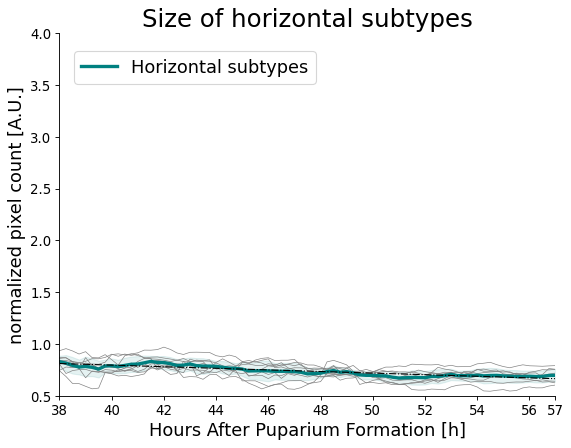

In [456]:
plt.figure(figsize=(8, 6), dpi=80)
colors = {'A':'teal','B':'teal' , 'C':'#881a58', 'D':'#881a58', 'C/D':'#881a58'}
samples = list(subset.loc[:, ~subset.columns.isin(['timepoints', 'mean_'+plot_col, 'std_'+plot_col])].columns)

for name in samples:
    plt.plot(subset['timepoints'], subset[name], c='gray', linewidth=0.6, linestyle='solid')

plt.plot(subset['timepoints'], subset['mean_'+plot_col], label='Horizontal subtypes',
        c=colors['A'], linestyle='solid', linewidth=3)

min_val = subset['mean_'+plot_col] - 1*subset['std_'+plot_col]
max_val = subset['mean_'+plot_col] + 1*subset['std_'+plot_col]
plt.fill_between(subset['timepoints'], min_val, max_val, color=colors['A'], alpha=.1)

a, b = np.polyfit(subset['timepoints'], subset['mean_'+plot_col], 1)
plt.plot(subset['timepoints'], a*subset['timepoints']+b, c='black', linestyle='dashdot', linewidth=1)

plt.legend(bbox_to_anchor=(.03, .95), loc=2, borderaxespad=0., prop={'size': 16})
plt.title('Size of horizontal subtypes', fontsize=22)
plt.ylabel('normalized pixel count [A.U.]', fontsize=16)
plt.ylim(0.5,4)
plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
plt.xticks(x_range1)
plt.xlabel("Hours After Puparium Formation [h]", fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.despine()
fig_name = save_path+plot_col+'_horizontal_July.pdf'
# plt.savefig(fig_name, bbox_inches='tight')


plotting two subsets (both means with their 68 CI)

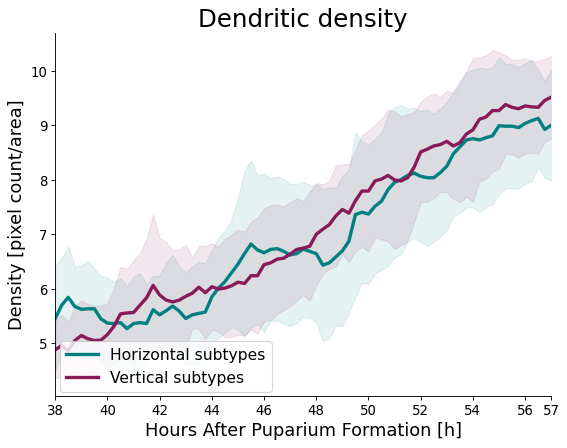

In [480]:
plt.figure(figsize=(8, 6), dpi=80)
colors = {'A':'teal','B':'teal' , 'C':'#881a58', 'D':'#881a58', 'C/D':'#881a58'}

plt.plot(subset['timepoints'], subset['mean_'+plot_col], label='Horizontal subtypes',
        c=colors['A'], linestyle='solid', linewidth=3)

min_val = subset['mean_'+plot_col] - 1*subset['std_'+plot_col]
max_val = subset['mean_'+plot_col] + 1*subset['std_'+plot_col]
plt.fill_between(subset['timepoints'], min_val, max_val, color=colors['A'], alpha=.1)

plt.plot(subset1_1['timepoints'], subset1_1['mean_'+plot_col], label='Vertical subtypes',
        c=colors['D'], linestyle='solid', linewidth=3)

min_val = subset1_1['mean_'+plot_col] - 1*subset1_1['std_'+plot_col]
max_val = subset1_1['mean_'+plot_col] + 1*subset1_1['std_'+plot_col]
plt.fill_between(subset1_1['timepoints'], min_val, max_val, color=colors['D'], alpha=.1)

plt.legend(bbox_to_anchor=(.01, 0.15), loc=2, borderaxespad=0., prop={'size': 14})
plt.title('Dendritic density', fontsize=22)
plt.ylabel('Density [pixel count/area]', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
# plt.ylim(0.5,1)
plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
sns.despine()
plt.xticks(x_range1)
plt.xlabel("Hours After Puparium Formation [h]", fontsize=16)
fig_name = save_path+plot_col+'_July.pdf'
# plt.savefig(fig_name, bbox_inches='tight')

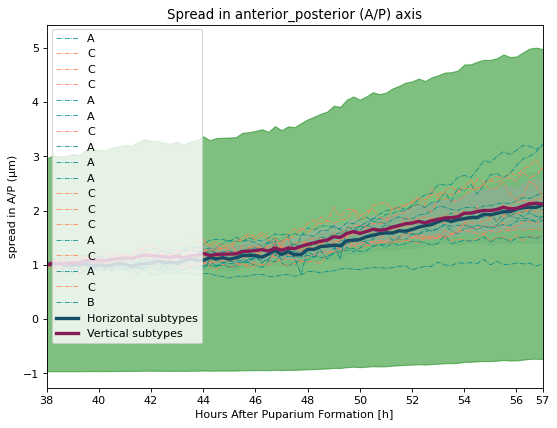

In [18]:
plt.figure(figsize=(8, 6), dpi=80)
colors = {'A':'darkcyan','B':'darkcyan' , 'C':'coral', 'D':'coral', 'C/D':'coral'}
for name, n_type in neu_types.items():
    plt.plot(norm_results['timepoints'], norm_results[name], c=colors[n_type], label=n_type, linewidth=0.7, linestyle='dashdot')

# plt.plot(norm_results['timepoints'], norm_results['mean_'+plot_col], 
#         c='black', linestyle='solid', linewidth=2)
# plt.plot(df_all.time, mean_val, c='r')
# a, b = np.polyfit(norm_results['timepoints'], norm_results['mean_'+plot_col], 1)
# plt.plot(norm_results['timepoints'], a*norm_results['timepoints']+b, c='black', linestyle='dashdot', linewidth=1)

# plt.plot(norm_results['timepoints'], subset['mean_x_spread'], label='A',c='black', linewidth=0.5, linestyle='solid', alpha=1)
# plt.plot(norm_results['timepoints'], a1*norm_results['timepoints']+b1, c='orange', linestyle='dashdot', linewidth=1)
# plt.plot(norm_results['timepoints'], subset1['mean_x_spread'], label='C/D',c='orange', linewidth=0.5, linestyle='solid', alpha=1)

plt.plot(norm_results['timepoints'], subset['mean_'+plot_col], label='Horizontal subtypes',
        c='#164c64', linestyle='solid', linewidth=3)
plt.plot(norm_results['timepoints'], subset1_1['mean_'+plot_col], label='Vertical subtypes',
        c='#881a58', linestyle='solid', linewidth=3)

min_val = subset['mean_'+plot_col] - 1*subset['std_'+plot_col]
max_val = subset['mean_'+plot_col] + 1*subset['std_'+plot_col]
plt.fill_between(subset['timepoints'], min_val, max_val, color='skyblue', alpha=.15)

min_val = subset1_1['mean_'+plot_col] - 1*subset1_1['std_'+plot_col]
max_val = subset1_1['mean_'+plot_col] + 1*subset1_1['std_'+plot_col]

ci = 1.96 * subset1_1['mean_'+plot_col]/np.sqrt(subset1_1['mean_'+plot_col])

# fig, ax = plt.subplots()
# ax.plot(x,y)
plt.fill_between(subset1_1['timepoints'], (subset1_1['mean_'+plot_col]-ci), (subset1_1['mean_'+plot_col]+ci), 
                color='green', alpha=0.5)

plt.fill_between(subset1_1['timepoints'], min_val, max_val, color='violet', alpha=.15)

plt.legend(bbox_to_anchor=(.01, .99), loc=2, borderaxespad=0.)
plt.title('Spread in anterior_posterior (A/P) axis')
plt.ylabel('spread in A/P (μm)')
# plt.ylim(0.4,1.1)
plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
# x_range1.append(58)
plt.xticks(x_range1)
plt.xlabel("Hours After Puparium Formation [h]")
fig_name = save_path+plot_col+'testtest.pdf'
# plt.savefig(fig_name, bbox_inches='tight')

In [272]:
x_range1

[38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 100]

In [256]:
subset['mean_'+plot_col].sum()

111.17885492131246

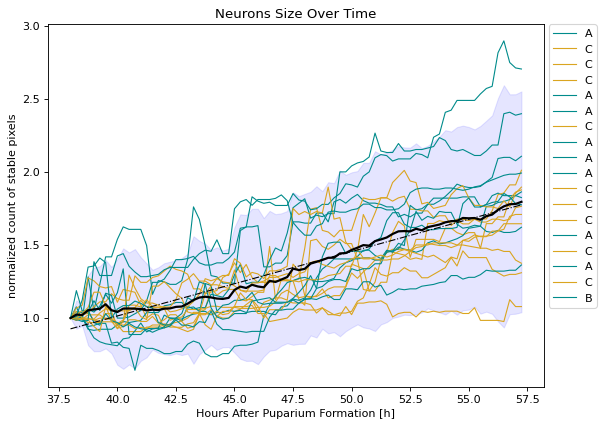

In [100]:
plt.figure(figsize=(8, 6), dpi=80)
colors = {'A':'darkcyan','B':'darkcyan' , 'C':'goldenrod', 'D':'goldenrod', 'C/D':'gray'}
for name, n_type in neu_types.items():
    plt.plot(norm_results1['timepoints'], norm_results1[name], c=colors[n_type], label=n_type, linewidth=1)

plt.plot(norm_results1['timepoints'], norm_results1['mean_'+plot_col], 
        c='black', linestyle='solid', linewidth=2)
# plt.plot(df_all.time, mean_val, c='r')
a, b = np.polyfit(norm_results1['timepoints'], norm_results1['mean_'+plot_col], 1)
plt.plot(norm_results1['timepoints'], a*norm_results1['timepoints']+b, c='black', linestyle='dashdot', linewidth=1)

# plt.plot(norm_results['timepoints'], subset['mean_x_spread'], label='A',c='black', linewidth=0.5, linestyle='solid', alpha=1)
# plt.plot(norm_results['timepoints'], a1*norm_results['timepoints']+b1, c='orange', linestyle='dashdot', linewidth=1)
# plt.plot(norm_results['timepoints'], subset1['mean_x_spread'], label='C/D',c='orange', linewidth=0.5, linestyle='solid', alpha=1)


min_val = norm_results1['mean_'+plot_col] - 2*norm_results1['std_'+plot_col]
max_val = norm_results1['mean_'+plot_col] + 2*norm_results1['std_'+plot_col]
plt.fill_between(norm_results['timepoints'], min_val, max_val, color='blue', alpha=.1)

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.title('Neurons Size Over Time')
plt.ylabel('normalized count of stable pixels')
plt.xlabel("Hours After Puparium Formation [h]")
fig_name = save_path+plot_col+'.pdf'
plt.savefig(fig_name, bbox_inches='tight')


Intel MKL ERROR: Parameter 6 was incorrect on entry to DGELSD.


/tmp/ipykernel_562136/1771850018.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['211011_P37_N1_sB'] = norm_results['211011_P37_N1_sB']
/tmp/ipykernel_562136/1771850018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['timepoints'] = norm_results['timepoints']
/tmp/ipykernel_562136/1771850018.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

LinAlgError: SVD did not converge in Linear Least Squares

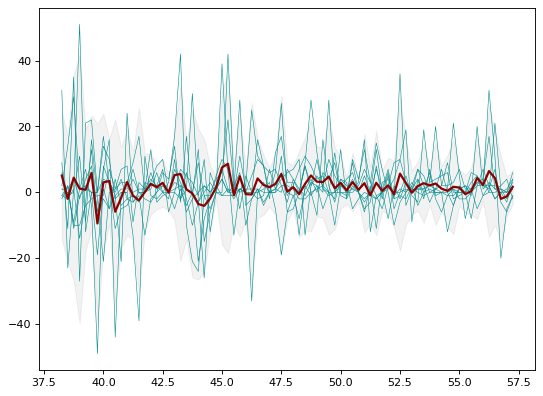

/tmp/ipykernel_549431/1033249878.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2_2['timepoints'] = norm_results1['timepoints']
/tmp/ipykernel_549431/1033249878.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2_2['mean_'+plot_col] = subset2_2.loc[:, subset2_2.columns != 'timepoints'].mean(axis = 1)
/tmp/ipykernel_549431/1033249878.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

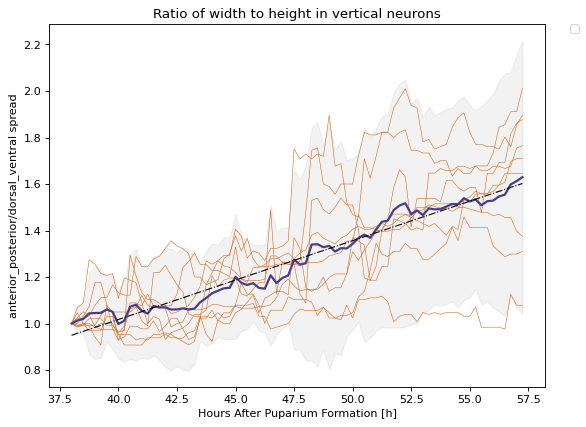

In [103]:
# neu_typs.neu_name
ss = neu_types1[neu_types1.neu_type == 'C']
# ss.append(['B','211011_P37_N1_sB'])
# ss.append(['timepoints','timepoints'])
subset2_2 = norm_results1[ss.neu_name]
# subset['211011_P37_N1_sB'] = norm_results['211011_P37_N1_sB']
subset2_2['timepoints'] = norm_results1['timepoints']

subset2_2['mean_'+plot_col] = subset2_2.loc[:, subset2_2.columns != 'timepoints'].mean(axis = 1)
subset2_2['std_'+plot_col] = subset2_2.loc[:, subset2_2.columns != 'timepoints'].std(axis = 1)


plt.figure(figsize=(8, 6), dpi=80)
colors = {'A':'darkcyan','B':'darkcyan','C':'chocolate'}
for idx, row in ss.iterrows():
    plt.plot(subset2_2['timepoints'], subset2_2[row.neu_name], c=colors[row.neu_type],  linewidth=0.5)
# plt.plot(subset['timepoints'], subset['211011_P37_N1_sB'], c=colors[row.neu_type], linewidth=0.5)
plt.plot(norm_results['timepoints'], subset2_2['mean_'+plot_col], 
        c='darkslateblue', linestyle='solid', linewidth=2)
# plt.plot(df_all.time, mean_val, c='r')
min_val = subset2_2['mean_'+plot_col] - 2*subset2_2['std_'+plot_col]
max_val = subset2_2['mean_'+plot_col] + 2*subset2_2['std_'+plot_col]
plt.fill_between(norm_results['timepoints'], min_val, max_val, color='gray', alpha=.1)


a, b = np.polyfit(norm_results1['timepoints'], subset2_2['mean_'+plot_col], 1)
plt.plot(norm_results['timepoints'], a*norm_results['timepoints']+b, c='black', linestyle='dashdot', linewidth=1)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Ratio of width to height in vertical neurons')
plt.ylabel('anterior_posterior/dorsal_ventral spread')
plt.xlabel("Hours After Puparium Formation [h]")
fig_name = save_path+plot_col+'C_D.pdf'
plt.savefig(fig_name, bbox_inches='tight')

/tmp/ipykernel_549431/3125748186.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ss.append(['B','211011_P37_N1_sB'])
/tmp/ipykernel_549431/3125748186.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['211011_P37_N1_sB'] = norm_results['211011_P37_N1_sB']
/tmp/ipykernel_549431/3125748186.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2_1['timepoints'] = norm_results1['timepoints']
/tmp/ipykernel_5

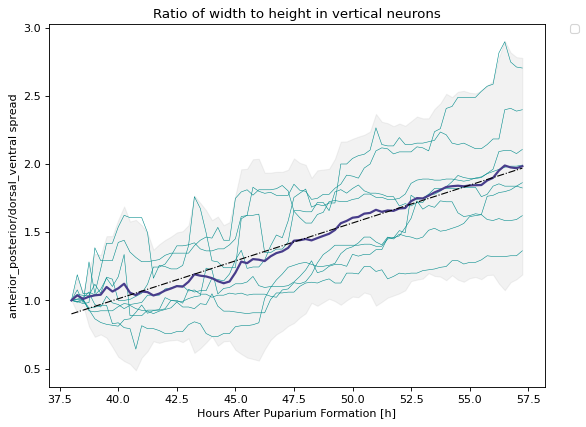

In [105]:
# neu_typs.neu_name
ss = neu_types1[neu_types1.neu_type == 'A']
ss.append(['B','211011_P37_N1_sB'])
# ss.append(['timepoints','timepoints'])
subset2_1 = norm_results1[ss.neu_name]
subset['211011_P37_N1_sB'] = norm_results['211011_P37_N1_sB']
subset2_1['timepoints'] = norm_results1['timepoints']

subset2_1['mean_'+plot_col] = subset2_1.loc[:, subset2_1.columns != 'timepoints'].mean(axis = 1)
subset2_1['std_'+plot_col] = subset2_1.loc[:, subset2_1.columns != 'timepoints'].std(axis = 1)


plt.figure(figsize=(8, 6), dpi=80)
colors = {'A':'darkcyan','B':'darkcyan','C':'chocolate'}
for idx, row in ss.iterrows():
    plt.plot(subset2_1['timepoints'], subset2_1[row.neu_name], c=colors[row.neu_type],  linewidth=0.5)
# plt.plot(subset['timepoints'], subset['211011_P37_N1_sB'], c=colors[row.neu_type], linewidth=0.5)
plt.plot(norm_results['timepoints'], subset2_1['mean_'+plot_col], 
        c='darkslateblue', linestyle='solid', linewidth=2)
# plt.plot(df_all.time, mean_val, c='r')
min_val = subset2_1['mean_'+plot_col] - 2*subset2_1['std_'+plot_col]
max_val = subset2_1['mean_'+plot_col] + 2*subset2_1['std_'+plot_col]
plt.fill_between(norm_results['timepoints'], min_val, max_val, color='gray', alpha=.1)


a, b = np.polyfit(norm_results1['timepoints'], subset2_1['mean_'+plot_col], 1)
plt.plot(norm_results['timepoints'], a*norm_results['timepoints']+b, c='black', linestyle='dashdot', linewidth=1)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Ratio of width to height in vertical neurons')
plt.ylabel('anterior_posterior/dorsal_ventral spread')
plt.xlabel("Hours After Puparium Formation [h]")
fig_name = save_path+plot_col+'C_D.pdf'
plt.savefig(fig_name, bbox_inches='tight')

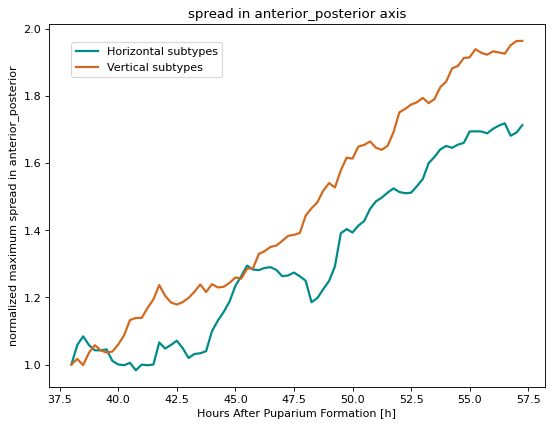

In [135]:
plt.figure(figsize=(8, 6), dpi=80)
colors = {'Horizontal subtypes':'darkcyan','B':'darkcyan','Vertical subtypes':'chocolate'}

plt.plot(norm_results['timepoints'], subset['mean_'+plot_col], label='Horizontal subtypes',
        c='darkcyan', linestyle='solid', linewidth=2)
# a, b = np.polyfit(norm_results1['timepoints'], subset['mean_'+plot_col], 1)
# plt.plot(norm_results['timepoints'], a*norm_results['timepoints']+b, c='black', linestyle='dashdot', linewidth=1)

plt.plot(norm_results['timepoints'], subset1_1['mean_'+plot_col], label='Vertical subtypes',
        c='chocolate', linestyle='solid', linewidth=2)
# a, b = np.polyfit(norm_results1['timepoints'], subset1_1['mean_'+plot_col], 1)
# plt.plot(norm_results['timepoints'], a*norm_results['timepoints']+b, c='black', linestyle='dashdot', linewidth=1)

plt.legend(bbox_to_anchor=(0.35, 0.95), loc=1, borderaxespad=0.)
plt.title('spread in anterior_posterior axis')
plt.ylabel('normalized maximum spread in anterior_posterior')
plt.xlabel("Hours After Puparium Formation [h]")
fig_name = save_path+plot_col+'_all.pdf'
plt.savefig(fig_name, bbox_inches='tight')

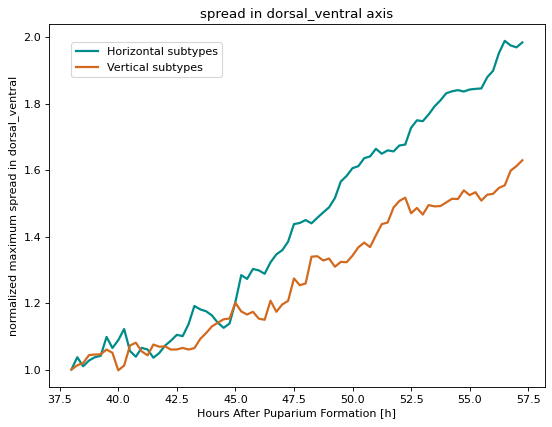

In [136]:
plt.figure(figsize=(8, 6), dpi=80)
colors = {'Horizontal subtypes':'darkcyan','B':'darkcyan','Vertical subtypes':'chocolate'}

plt.plot(norm_results['timepoints'], subset2_1['mean_'+plot_col], label='Horizontal subtypes',
        c='darkcyan', linestyle='solid', linewidth=2)
# a, b = np.polyfit(norm_results1['timepoints'], subset2_1['mean_'+plot_col], 1)
# plt.plot(norm_results['timepoints'], a*norm_results['timepoints']+b, c='black', linestyle='dashdot', linewidth=1)

plt.plot(norm_results['timepoints'], subset2_2['mean_'+plot_col], label='Vertical subtypes',
        c='chocolate', linestyle='solid', linewidth=2)
# a, b = np.polyfit(norm_results1['timepoints'], subset2_2['mean_'+plot_col], 1)
# plt.plot(norm_results['timepoints'], a*norm_results['timepoints']+b, c='black', linestyle='dashdot', linewidth=1)

plt.legend(bbox_to_anchor=(0.35, 0.95), loc=1, borderaxespad=0.)
plt.title('spread in dorsal_ventral axis')
plt.ylabel('normalized maximum spread in dorsal_ventral')
plt.xlabel("Hours After Puparium Formation [h]")
fig_name = save_path+plot_col1+'_all.pdf'
plt.savefig(fig_name, bbox_inches='tight')

In [53]:
# neu_typs.neu_name
ss1 = neu_typs[neu_typs.neu_type == 'C/D']
subset1 = norm_results[ss1.neu_name]

subset1['mean_'+plot_col] = subset1.loc[:, subset1.columns != 'timepoints'].mean(axis = 1)
subset1['std_'+plot_col] = subset1.loc[:, subset1.columns != 'timepoints'].std(axis = 1)


plt.figure(figsize=(8, 6), dpi=80)
colors = {'A':'green','C/D':'gray'}
for idx, row in ss1.iterrows():
    plt.plot(norm_results['timepoints'], subset1[row.neu_name], c=colors[row.neu_type], label=row.neu_type, linewidth=1)

plt.plot(norm_results['timepoints'], subset1['mean_x_spread'], 
        c='blue', linestyle='solid', linewidth=2)
# plt.plot(df_all.time, mean_val, c='r')
min_val = subset1['mean_x_spread'] - 2*subset1['std_x_spread']
max_val = subset1['mean_x_spread'] + 2*subset1['std_x_spread']
plt.fill_between(norm_results['timepoints'], min_val, max_val, color='blue', alpha=.1)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('ratio of AP_spread to DV_spread')
plt.ylabel('AP_spread/DV_spread')
plt.xlabel("Hours After Puparium Formation [h]")

NameError: name 'neu_typs' is not defined

Text(0.5, 0, 'Hours After Puparium Formation [h]')

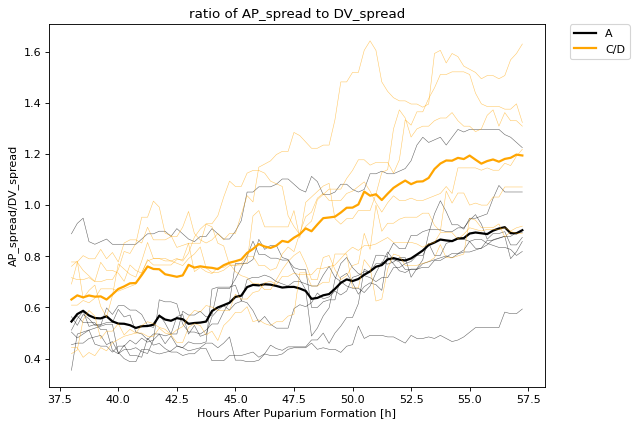

In [82]:
plt.figure(figsize=(8, 6), dpi=80)
colors = {'A':'green','C/D':'gray'}
plt.plot(norm_results['timepoints'], subset['mean_x_spread'], c='black', label='A', linewidth=2)
for idx, row in ss.iterrows():
    plt.plot(norm_results['timepoints'], subset[row.neu_name], c='black', linewidth=0.5, linestyle='solid', alpha=0.6)
plt.plot(norm_results['timepoints'], subset1['mean_x_spread'], c='orange', label='C/D', linewidth=2)
for idx, row in ss1.iterrows():
    plt.plot(norm_results['timepoints'], subset1[row.neu_name], c='orange', linewidth=0.5, linestyle='solid', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('ratio of AP_spread to DV_spread')
plt.ylabel('AP_spread/DV_spread')
plt.xlabel("Hours After Puparium Formation [h]")

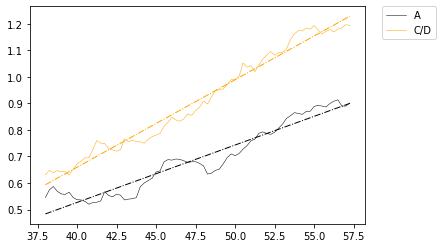

In [96]:
a, b = np.polyfit(norm_results['timepoints'], subset['mean_x_spread'], 1)
a1, b1 = np.polyfit(norm_results['timepoints'], subset1['mean_x_spread'], 1)
plt.plot(norm_results['timepoints'], a*norm_results['timepoints']+b, c='black', linestyle='dashdot', linewidth=1)
plt.plot(norm_results['timepoints'], subset['mean_x_spread'], label='A',c='black', linewidth=0.5, linestyle='solid', alpha=1)
plt.plot(norm_results['timepoints'], a1*norm_results['timepoints']+b1, c='orange', linestyle='dashdot', linewidth=1)
plt.plot(norm_results['timepoints'], subset1['mean_x_spread'], label='C/D',c='orange', linewidth=0.5, linestyle='solid', alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [89]:
a, a1

(0.021653146914903755, 0.03300778286040603)

In [24]:
collective_results.head()

,timepoints,220209_P36_N1,220127_P36_N1,211121_P36.5_N3,211114_P36_N3,211113_P36_N1,211104_P36_N3,211104_P36_N1,mean_vol_stable
0,37.75,3908,5009,5215,5097,3824,3494,6584,0.000000
1,38.00,4315,4980,5423,5023,3738,4103,6251,0.080515
2,38.25,4463,5075,5449,5076,3827,4282,6183,0.098567
3,38.50,4288,4972,5725,5333,3762,4301,5835,0.109347
4,38.75,4447,4964,5514,5529,3826,4476,5864,0.124135


In [ ]:
# compute rolling means and confident intervals
mean_val = df_all.cumulative.rolling(window).mean()
std_val = df_all.cumulative.rolling(window).std()
min_val = mean_val - 2*std_val
max_val = mean_val + 2*std_val


plt.figure(figsize=(16,9))
for col in col_names:
    plt.plot(timepoints, df.cumulative, c='blue')

plt.plot(df_all.time, mean_val, c='r')
plt.fill_between(df_all.time, min_val, max_val, color='blue', alpha=.2)
plt.show()

In [14]:
# xls = pd.ExcelFile('path_to_file.xls')
# df1 = pd.read_excel(xls, 'Sheet1')
# df2 = pd.read_excel(xls, 'Sheet2')

In [9]:
np.arange(37,38,0.25)

array([37.  , 37.25, 37.5 , 37.75])

In [ ]:
# compute rolling means and confident intervals
mean_val = df_all.cumulative.rolling(window).mean()
std_val = df_all.cumulative.rolling(window).std()
min_val = mean_val - 2*std_val
max_val = mean_val + 2*std_val


plt.figure(figsize=(16,9))
for col in col_names:
    plt.plot(timepoints, df.cumulative, c='blue')

plt.plot(df_all.time, mean_val, c='r')
plt.fill_between(df_all.time, min_val, max_val, color='blue', alpha=.2)
plt.show()

In [38]:
neu_types

{'220209_P36_N2_sA': 'A',
 '220209_P36_N1_sC': 'C',
 '220127_P36_N1_sC': 'C',
 '211121_P36.5_N3_sC': 'C',
 '211121_P36.5_N2_sA': 'A',
 '211121_P36.5_N1_sA': 'A',
 '211114_P36_N3_sC': 'C',
 '211114_P36_N2_sA': 'A',
 '211114_P36_N1_sA': 'A',
 '211113_P36_N2_sA': 'A',
 '211113_P36_N1_sC': 'C',
 '211107_P36_N3_sC': 'C',
 '211107_P36_N2_sC': 'C',
 '211107_P36_N1_sA': 'A',
 '211104_P36_N3_sC': 'C',
 '211104_P36_N2_sA': 'A',
 '211104_P36_N1_sC': 'C',
 '211011_P37_N1_sB': 'B'}

In [ ]:
files_list = datautils.get_file_names(data_path, group_by='', 
                                        order=True, nested_files=False, 
                                        criteria='tif')